# for 1 st material

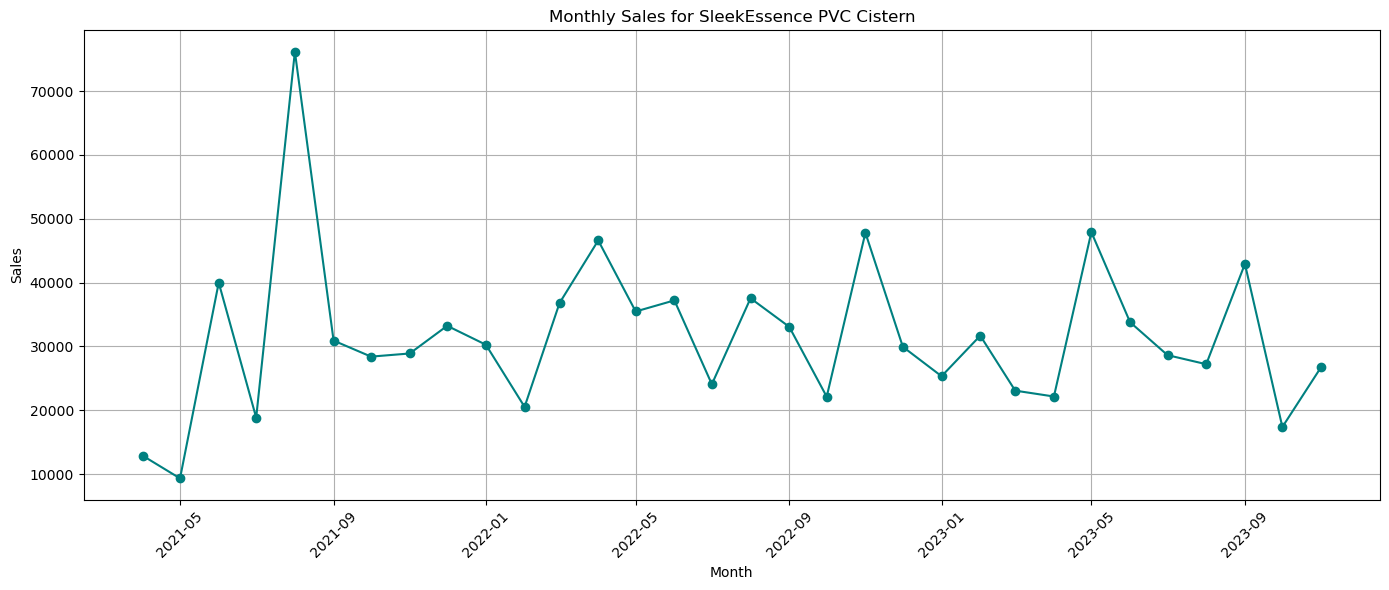

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
months = [
    "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
    "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
    "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
]

sales = [
    12906, 9342, 39993, 18852, 76164, 30920, 28410, 28902, 33235,
    30271, 20542, 36801, 46603, 35478, 37219, 24085, 37546, 33075, 22134, 47804, 29945,
    25340, 31691, 23082, 22163, 47905, 33803, 28642, 27223, 42930, 17391, 26758
]

# Create DataFrame
df = pd.DataFrame({'Month': pd.to_datetime(months, format='%b %y'), 'Sales': sales})

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(df['Month'], df['Sales'], marker='o', linestyle='-', color='teal')
plt.title('Monthly Sales for SleekEssence PVC Cistern')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [171]:
# Ljung-Box Test
lb_test = acorr_ljungbox(df['Sales'], lags=[10], return_df=True)
p_value = lb_test['lb_pvalue'].values[0]

print("📊 Ljung-Box Test Results:")
print(lb_test)

# Interpretation
if p_value < 0.05:
    print("\n❌ Residuals are NOT white noise (p < 0.05) → Autocorrelation is present → Modeling needed.")
else:
    print("\n✅ Residuals are white noise (p ≥ 0.05) → No strong autocorrelation → Simpler models may work.")

📊 Ljung-Box Test Results:
     lb_stat  lb_pvalue
10  4.620824   0.915027

✅ Residuals are white noise (p ≥ 0.05) → No strong autocorrelation → Simpler models may work.


In [172]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

# Step 1: Prepare Data
months = [
    "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
    "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
    "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
]

sales = [
    12906, 9342, 39993, 18852, 76164, 30920, 28410, 28902, 33235,
    30271, 20542, 36801, 46603, 35478, 37219, 24085, 37546, 33075, 22134, 47804, 29945,
    25340, 31691, 23082, 22163, 47905, 33803, 28642, 27223, 42930, 17391, 26758
]

# Create DataFrame
df = pd.DataFrame({'Month': pd.to_datetime(months, format='%b %y'), 'Sales': sales})
df.set_index('Month', inplace=True)

# Step 2: Train/Test Split
train = df.iloc[:-4]
test = df.iloc[-4:-1]  # last 4 months, keep 3 for evaluation
forecast_period = 3

# Store forecasts and MAPE
results = {}

# 1. Naive Forecast
naive_forecast = [train['Sales'].iloc[-1]] * forecast_period
naive_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], naive_forecast)
results['Naive'] = (naive_mape, naive_forecast)

# 2. Moving Average (window=3)
moving_avg_forecast = [train['Sales'].iloc[-3:].mean()] * forecast_period
ma_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], moving_avg_forecast)
results['Moving Average'] = (ma_mape, moving_avg_forecast)

# 3. Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(train['Sales']).fit()
ses_forecast = ses_model.forecast(forecast_period)
ses_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], ses_forecast)
results['SES'] = (ses_mape, ses_forecast.tolist())

# 4. Holt-Winters (trend only)
holt_model = ExponentialSmoothing(train['Sales'], trend="add", seasonal=None).fit()
holt_forecast = holt_model.forecast(forecast_period)
holt_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], holt_forecast)
results['Holt'] = (holt_mape, holt_forecast.tolist())

# 5. ARIMA
arima_model = ARIMA(train['Sales'], order=(1,1,1)).fit()
arima_forecast = arima_model.forecast(forecast_period)
arima_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], arima_forecast)
results['ARIMA'] = (arima_mape, arima_forecast.tolist())

# Step 3: Select Best Model
best_model = min(results.items(), key=lambda x: x[1][0])
best_model_name, (best_mape, best_forecast) = best_model

# Step 4: Final Output
mean_forecast = np.mean(best_forecast)

print(f"✅ Best Model: {best_model_name}")
print(f"📉 Best MAPE: {best_mape:.2f}")
print(f"🔮 Forecast (next 3 months): {best_forecast}")
print(f"📊 Mean Forecast: {mean_forecast:.2f}")


✅ Best Model: Naive
📉 Best MAPE: 0.34
🔮 Forecast (next 3 months): [np.int64(28642), np.int64(28642), np.int64(28642)]
📊 Mean Forecast: 28642.00


✅ Best Model: Naive
📉 Best MAPE: 0.34
🔮 Forecast (next 3 months): [np.int64(28642), np.int64(28642), np.int64(28642)]
📊 Mean Forecast: 28642.00


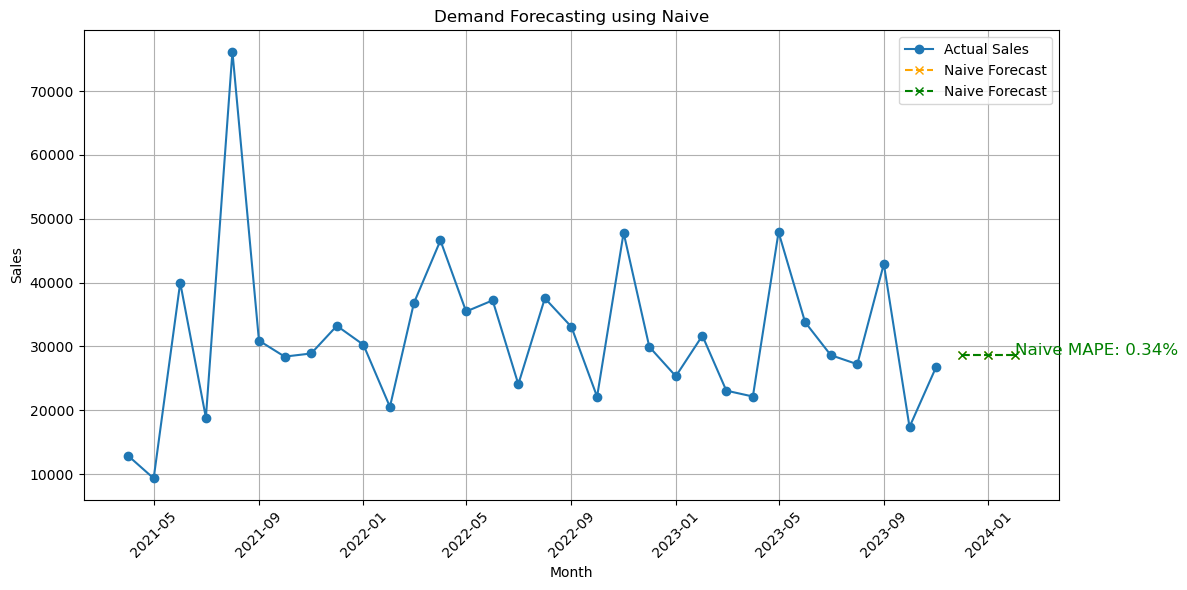

In [173]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Prepare Data
months = [
    "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
    "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
    "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
]

sales = [
    12906, 9342, 39993, 18852, 76164, 30920, 28410, 28902, 33235,
    30271, 20542, 36801, 46603, 35478, 37219, 24085, 37546, 33075, 22134, 47804, 29945,
    25340, 31691, 23082, 22163, 47905, 33803, 28642, 27223, 42930, 17391, 26758
]

# Create DataFrame
df = pd.DataFrame({'Month': pd.to_datetime(months, format='%b %y'), 'Sales': sales})
df.set_index('Month', inplace=True)

# Step 2: Train/Test Split
train = df.iloc[:-4]
test = df.iloc[-4:-1]  # last 4 months, keep 3 for evaluation
forecast_period = 3

# Store forecasts and MAPE
results = {}

# 1. Naive Forecast
naive_forecast = [train['Sales'].iloc[-1]] * forecast_period
naive_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], naive_forecast)
results['Naive'] = (naive_mape, naive_forecast)

# 2. Moving Average (window=3)
moving_avg_forecast = [train['Sales'].iloc[-3:].mean()] * forecast_period
ma_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], moving_avg_forecast)
results['Moving Average'] = (ma_mape, moving_avg_forecast)

# 3. Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(train['Sales']).fit()
ses_forecast = ses_model.forecast(forecast_period)
ses_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], ses_forecast)
results['SES'] = (ses_mape, ses_forecast.tolist())

# 4. Holt-Winters (trend only)
holt_model = ExponentialSmoothing(train['Sales'], trend="add", seasonal=None).fit()
holt_forecast = holt_model.forecast(forecast_period)
holt_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], holt_forecast)
results['Holt'] = (holt_mape, holt_forecast.tolist())

# 5. ARIMA
arima_model = ARIMA(train['Sales'], order=(1,1,1)).fit()
arima_forecast = arima_model.forecast(forecast_period)
arima_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], arima_forecast)
results['ARIMA'] = (arima_mape, arima_forecast.tolist())

# Step 3: Select Best Model
best_model = min(results.items(), key=lambda x: x[1][0])
best_model_name, (best_mape, best_forecast) = best_model

# Step 4: Final Output
mean_forecast = np.mean(best_forecast)

# Display results
print(f"✅ Best Model: {best_model_name}")
print(f"📉 Best MAPE: {best_mape:.2f}")
print(f"🔮 Forecast (next 3 months): {best_forecast}")
print(f"📊 Mean Forecast: {mean_forecast:.2f}")

# Plotting the graph
plt.figure(figsize=(12, 6))

# Plot the actual sales
plt.plot(df.index, df['Sales'], label='Actual Sales', marker='o')

# Plot the forecast for the best model
full_index = df.index.tolist() + pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_period, freq='MS').tolist()
full_sales = df['Sales'].tolist()  # Actual sales data
full_forecast = [np.nan] * len(df) + best_forecast  # NaN for historical part, forecast for future

plt.plot(full_index, full_forecast, label=f'{best_model_name} Forecast', marker='x', linestyle='--', color='orange')

# Plot the Naive forecast for comparison
naive_full_forecast = [np.nan] * len(df) + naive_forecast
plt.plot(full_index, naive_full_forecast, label="Naive Forecast", marker='x', linestyle='--', color='green')

# Add MAPE for Naive Forecast on the graph
plt.text(x=full_index[-1], y=naive_full_forecast[-1], s=f'Naive MAPE: {naive_mape:.2f}%', color='green', fontsize=12, ha='left')

plt.title(f'Demand Forecasting using {best_model_name}')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


✅ Best Model: Naive
📉 Best MAPE: 0.34
🔮 Forecast (next 3 months): [np.int64(28642), np.int64(28642), np.int64(28642)]
📊 Mean Forecast: 28642.00


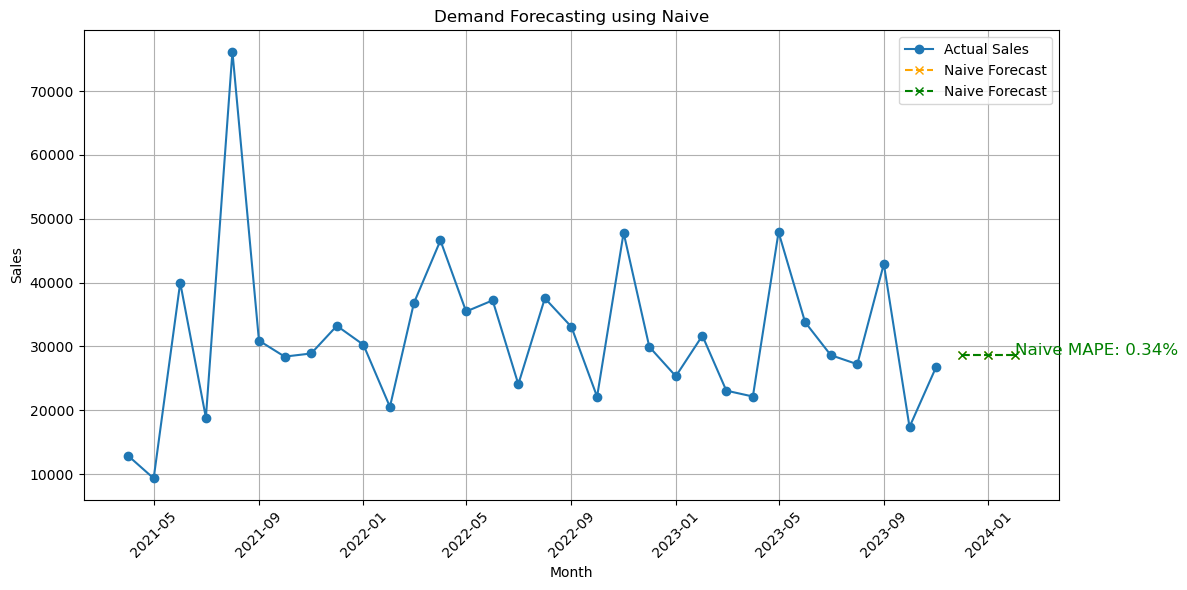

In [174]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Prepare Data
months = [
    "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
    "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
    "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
]

sales = [
    12906, 9342, 39993, 18852, 76164, 30920, 28410, 28902, 33235,
    30271, 20542, 36801, 46603, 35478, 37219, 24085, 37546, 33075, 22134, 47804, 29945,
    25340, 31691, 23082, 22163, 47905, 33803, 28642, 27223, 42930, 17391, 26758
]

# Create DataFrame
df = pd.DataFrame({'Month': pd.to_datetime(months, format='%b %y'), 'Sales': sales})
df.set_index('Month', inplace=True)

# Step 2: Train/Test Split
train = df.iloc[:-4]
test = df.iloc[-4:-1]  # last 4 months, keep 3 for evaluation
forecast_period = 3

# Store forecasts and MAPE
results = {}

# 1. Naive Forecast
naive_forecast = [train['Sales'].iloc[-1]] * forecast_period
naive_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], naive_forecast)
results['Naive'] = (naive_mape, naive_forecast)

# 2. Moving Average (window=3)
moving_avg_forecast = [train['Sales'].iloc[-3:].mean()] * forecast_period
ma_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], moving_avg_forecast)
results['Moving Average'] = (ma_mape, moving_avg_forecast)

# 3. Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(train['Sales']).fit()
ses_forecast = ses_model.forecast(forecast_period)
ses_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], ses_forecast)
results['SES'] = (ses_mape, ses_forecast.tolist())

# 4. Holt-Winters (trend only)
holt_model = ExponentialSmoothing(train['Sales'], trend="add", seasonal=None).fit()
holt_forecast = holt_model.forecast(forecast_period)
holt_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], holt_forecast)
results['Holt'] = (holt_mape, holt_forecast.tolist())

# 5. ARIMA
arima_model = ARIMA(train['Sales'], order=(1,1,1)).fit()
arima_forecast = arima_model.forecast(forecast_period)
arima_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], arima_forecast)
results['ARIMA'] = (arima_mape, arima_forecast.tolist())

# 6. Exponential Smoothing with Seasonal Components
holt_winters_model = ExponentialSmoothing(train['Sales'], trend="add", seasonal="add", seasonal_periods=12).fit()
holt_winters_forecast = holt_winters_model.forecast(forecast_period)
holt_winters_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], holt_winters_forecast)
results['Holt-Winters (Seasonal)'] = (holt_winters_mape, holt_winters_forecast.tolist())

# 7. SARIMA
sarima_model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.forecast(forecast_period)
sarima_mape = mean_absolute_percentage_error(test['Sales'].values[:forecast_period], sarima_forecast)
results['SARIMA'] = (sarima_mape, sarima_forecast.tolist())

# Step 3: Select Best Model
best_model = min(results.items(), key=lambda x: x[1][0])
best_model_name, (best_mape, best_forecast) = best_model

# Step 4: Final Output
mean_forecast = np.mean(best_forecast)

# Display results
print(f"✅ Best Model: {best_model_name}")
print(f"📉 Best MAPE: {best_mape:.2f}")
print(f"🔮 Forecast (next 3 months): {best_forecast}")
print(f"📊 Mean Forecast: {mean_forecast:.2f}")

# Plotting the graph
plt.figure(figsize=(12, 6))

# Plot the actual sales
plt.plot(df.index, df['Sales'], label='Actual Sales', marker='o')

# Plot the forecast for the best model
full_index = df.index.tolist() + pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_period, freq='MS').tolist()
full_sales = df['Sales'].tolist()  # Actual sales data
full_forecast = [np.nan] * len(df) + best_forecast  # NaN for historical part, forecast for future

plt.plot(full_index, full_forecast, label=f'{best_model_name} Forecast', marker='x', linestyle='--', color='orange')

# Plot the Naive forecast for comparison
naive_full_forecast = [np.nan] * len(df) + naive_forecast
plt.plot(full_index, naive_full_forecast, label="Naive Forecast", marker='x', linestyle='--', color='green')

# Add MAPE for Naive Forecast on the graph
plt.text(x=full_index[-1], y=naive_full_forecast[-1], s=f'Naive MAPE: {naive_mape:.2f}%', color='green', fontsize=12, ha='left')

plt.title(f'Demand Forecasting using {best_model_name}')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2nd Material

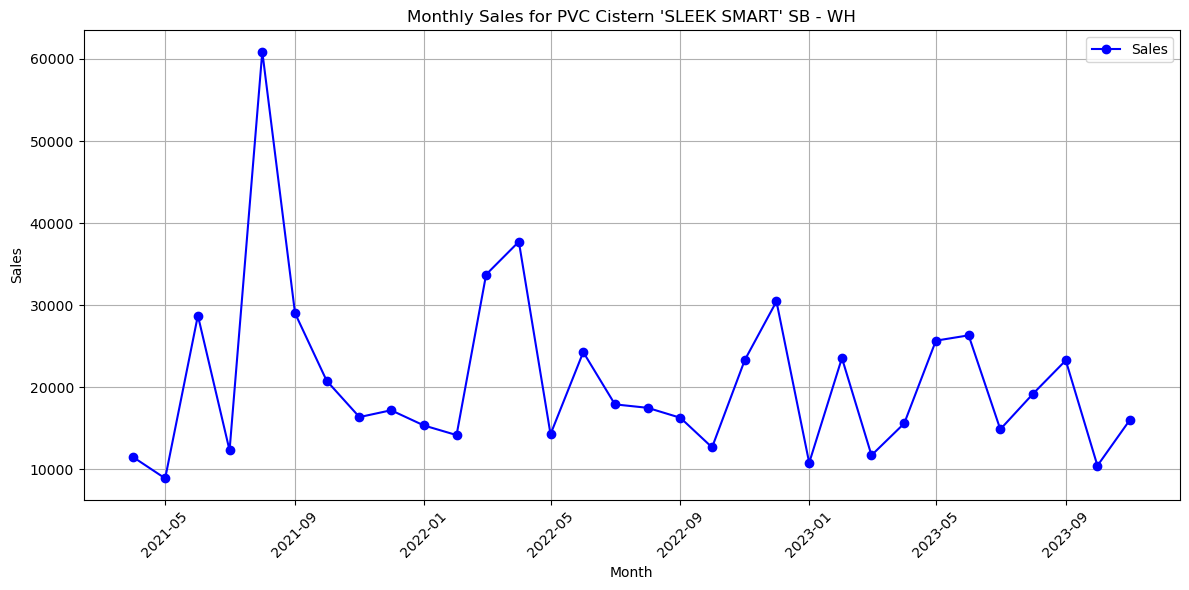

In [175]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Defining the dataset
data = {
    "Month": [
        "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
        "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
        "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
    ],
    "Sales": [
        11441, 8876, 28731, 12286, 60893, 29014, 20771, 16348, 17182, 15331, 14155, 33727, 37731,
        14255, 24271, 17899, 17478, 16263, 12658, 23305, 30449, 10775, 23548, 11694, 15575, 25665, 26313,
        14859, 19193, 23261, 10424, 16051
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%b %y')
df.set_index('Month', inplace=True)

# Plotting the sales data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], marker='o', color='b', label='Sales')
plt.title("Monthly Sales for PVC Cistern 'SLEEK SMART' SB - WH")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [176]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test
ljung_box_result = acorr_ljungbox(df['Sales'], lags=[10], return_df=True)

# Display results
print(ljung_box_result)

# Interpretation
p_value = ljung_box_result['lb_pvalue'].iloc[0]
if p_value < 0.05:
    print("Residuals are not white noise → autocorrelation present → modeling needed.")
else:
    print("Residuals are white noise → no strong autocorrelation → simpler models may work.")


      lb_stat  lb_pvalue
10  10.083908   0.433163
Residuals are white noise → no strong autocorrelation → simpler models may work.


In [177]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Parameters
test_size = 4
forecast_period = 3

# Split data
train = df[:-test_size]
test = df[-test_size:]


In [178]:
# Mean of training sales
mean_forecast_value = train['Sales'].mean()

# Forecast for test and future
test_forecast = [mean_forecast_value] * test_size
future_forecast = [mean_forecast_value] * forecast_period


In [179]:
# Calculate MAPE
mape = mean_absolute_percentage_error(test['Sales'], test_forecast) * 100
print(f"MAPE on test data: {mape:.2f}%")

# Check model quality
if mape < 10:
    print("Model is good (MAPE < 10%)")
else:
    print("Model is not good (MAPE >= 10%)")


MAPE on test data: 38.38%
Model is not good (MAPE >= 10%)


In [180]:
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.ar_model import AutoReg

# Split
test_size = 4
forecast_period = 3
train = df[:-test_size]
test = df[-test_size:]


In [181]:
mean_forecast = [train['Sales'].mean()] * test_size
mape_mean = mean_absolute_percentage_error(test['Sales'], mean_forecast) * 100
print(f"Mean Forecast MAPE: {mape_mean:.2f}%")


Mean Forecast MAPE: 38.38%


In [182]:
naive_forecast = [train['Sales'].iloc[-1]] * test_size
mape_naive = mean_absolute_percentage_error(test['Sales'], naive_forecast) * 100
print(f"Naive Forecast MAPE: {mape_naive:.2f}%")


Naive Forecast MAPE: 27.17%


In [183]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train['Sales']).fit()
ses_forecast = ses_model.forecast(test_size)
mape_ses = mean_absolute_percentage_error(test['Sales'], ses_forecast) * 100
print(f"Simple Exponential Smoothing MAPE: {mape_ses:.2f}%")


Simple Exponential Smoothing MAPE: 32.66%


In [184]:
hw_model = ExponentialSmoothing(train['Sales'], trend='add', seasonal=None).fit()
hw_forecast = hw_model.forecast(test_size)
mape_hw = mean_absolute_percentage_error(test['Sales'], hw_forecast) * 100
print(f"Holt-Winters (Additive Trend) MAPE: {mape_hw:.2f}%")


Holt-Winters (Additive Trend) MAPE: 51.54%


In [185]:
ar_model = AutoReg(train['Sales'], lags=4).fit()
ar_forecast = ar_model.predict(start=len(train), end=len(train)+test_size-1)
mape_ar = mean_absolute_percentage_error(test['Sales'], ar_forecast) * 100
print(f"AutoReg MAPE: {mape_ar:.2f}%")


AutoReg MAPE: 49.34%


In [186]:
arima_model = ARIMA(train['Sales'], order=(1,1,1)).fit()
arima_forecast = arima_model.forecast(steps=test_size)
mape_arima = mean_absolute_percentage_error(test['Sales'], arima_forecast) * 100
print(f"ARIMA(1,1,1) MAPE: {mape_arima:.2f}%")


ARIMA(1,1,1) MAPE: 34.57%


In [187]:
stl_arima = STLForecast(train['Sales'], ARIMA, model_kwargs={"order": (1,1,1)}).fit()
stl_forecast = stl_arima.forecast(test_size)
mape_stl = mean_absolute_percentage_error(test['Sales'], stl_forecast) * 100
print(f"STL + ARIMA Forecast MAPE: {mape_stl:.2f}%")


STL + ARIMA Forecast MAPE: 36.48%


In [188]:
results = {
    "Mean": mape_mean,
    "Naive": mape_naive,
    "SES": mape_ses,
    "Holt-Winters": mape_hw,
    "AutoReg": mape_ar,
    "ARIMA": mape_arima,
    "STL+ARIMA": mape_stl
}

best_model = min(results, key=results.get)
print(f"\n✅ Best Model: {best_model} with MAPE = {results[best_model]:.2f}%")



✅ Best Model: Naive with MAPE = 27.17%


In [189]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA (p,d,q)(P,D,Q,s) — basic config, tune as needed
sarima_model = SARIMAX(train['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
sarima_forecast = sarima_model.forecast(steps=test_size)
mape_sarima = mean_absolute_percentage_error(test['Sales'], sarima_forecast) * 100
print(f"SARIMA(1,1,1)(1,1,1,12) MAPE: {mape_sarima:.2f}%")


SARIMA(1,1,1)(1,1,1,12) MAPE: 90.14%


In [190]:
future_forecast = []

if best_model == "Mean":
    future_forecast = [train['Sales'].mean()] * forecast_period

elif best_model == "Naive":
    future_forecast = [train['Sales'].iloc[-1]] * forecast_period

elif best_model == "Drift":
    future_forecast = [train['Sales'].iloc[-1] + (i+1) * drift_slope for i in range(forecast_period)]

elif best_model == "SES":
    future_forecast = ses_model.forecast(forecast_period)

elif best_model == "Holt-Winters":
    future_forecast = hw_model.forecast(forecast_period)

elif best_model == "AutoReg":
    future_forecast = ar_model.predict(start=len(train), end=len(train)+forecast_period-1)

elif best_model == "ARIMA":
    future_forecast = arima_model.forecast(steps=forecast_period)

elif best_model == "STL+ARIMA":
    future_forecast = stl_arima.forecast(forecast_period)

elif best_model == "SARIMA":
    future_forecast = sarima_model.forecast(steps=forecast_period)


In [191]:
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(), periods=forecast_period, freq='MS')
forecast_df = pd.DataFrame({'Forecast': future_forecast}, index=future_dates)

print("\n📊 3-Month Forecast Using Best Model:")
print(forecast_df)



📊 3-Month Forecast Using Best Model:
            Forecast
2023-12-01     14859
2024-01-01     14859
2024-02-01     14859


In [192]:
# Apply Box-Cox to train data
train_bc, lambda_bc = boxcox(train['Sales'])

# Use this transformed data for ARIMA-based models only


In [193]:
from scipy.special import inv_boxcox


arima_bc_model = ARIMA(train_bc, order=(1,1,1)).fit()
arima_bc_forecast = arima_bc_model.forecast(steps=test_size)
arima_bc_forecast = inv_boxcox(arima_bc_forecast, lambda_bc)
mape_arima_bc = mean_absolute_percentage_error(test['Sales'], arima_bc_forecast) * 100
print(f"ARIMA + Box-Cox MAPE: {mape_arima_bc:.2f}%")


ARIMA + Box-Cox MAPE: 30.69%


In [194]:
sarima_bc_model = SARIMAX(train_bc, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
sarima_bc_forecast = sarima_bc_model.forecast(steps=test_size)
sarima_bc_forecast = inv_boxcox(sarima_bc_forecast, lambda_bc)
mape_sarima_bc = mean_absolute_percentage_error(test['Sales'], sarima_bc_forecast) * 100
print(f"SARIMA + Box-Cox MAPE: {mape_sarima_bc:.2f}%")


SARIMA + Box-Cox MAPE: 36.81%


In [195]:
# Forecast next 3 months based on best model
if best_model == "ARIMA + BoxCox":
    future_forecast = arima_bc_model.forecast(steps=forecast_period)
    future_forecast = inv_boxcox(future_forecast, lambda_bc)

elif best_model == "STL + ARIMA + BoxCox":
    future_forecast = stl_bc_model.forecast(steps=forecast_period)
    future_forecast = inv_boxcox(future_forecast, lambda_bc)

elif best_model == "SARIMA + BoxCox":
    future_forecast = sarima_bc_model.forecast(steps=forecast_period)
    future_forecast = inv_boxcox(future_forecast, lambda_bc)

else:
    print("Best model is not Box-Cox based..")
    # Use previous Step 12 logic here


Best model is not Box-Cox based..


In [196]:
# Create date index
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(), periods=forecast_period, freq='MS')

# Final forecast DataFrame
forecast_df = pd.DataFrame({'Forecast': future_forecast}, index=future_dates)
print("\n📊 3-Month Forecast Using Best Box-Cox Model:")
print(forecast_df)



📊 3-Month Forecast Using Best Box-Cox Model:
            Forecast
2023-12-01     14859
2024-01-01     14859
2024-02-01     14859


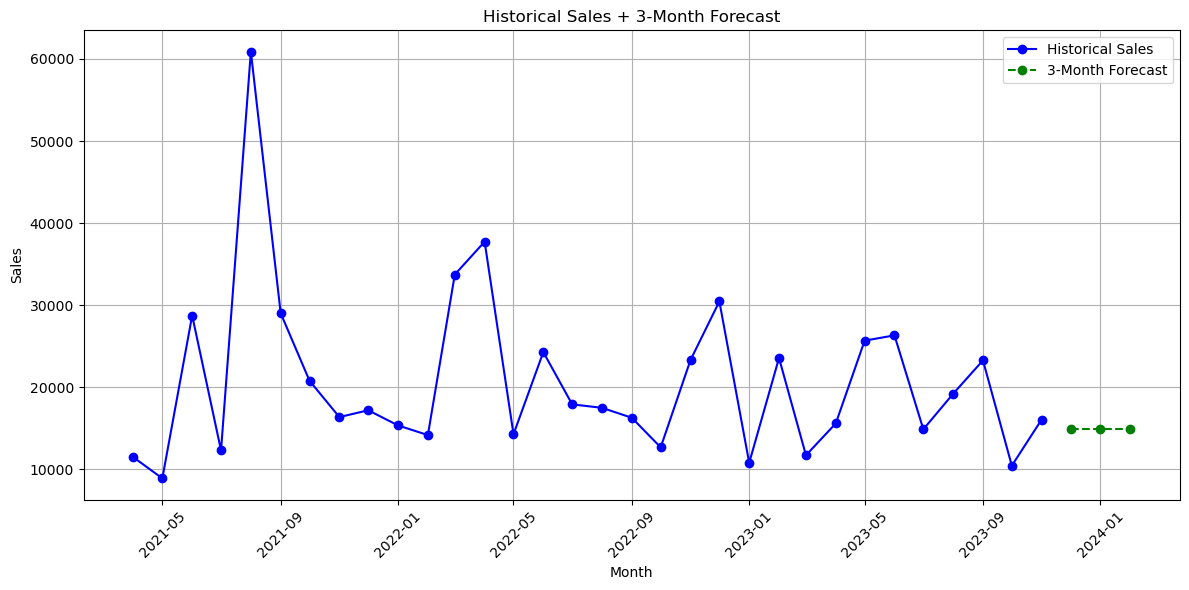

In [197]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Historical Sales', marker='o', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='3-Month Forecast', marker='o', color='green', linestyle='--')

plt.title("Historical Sales + 3-Month Forecast")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


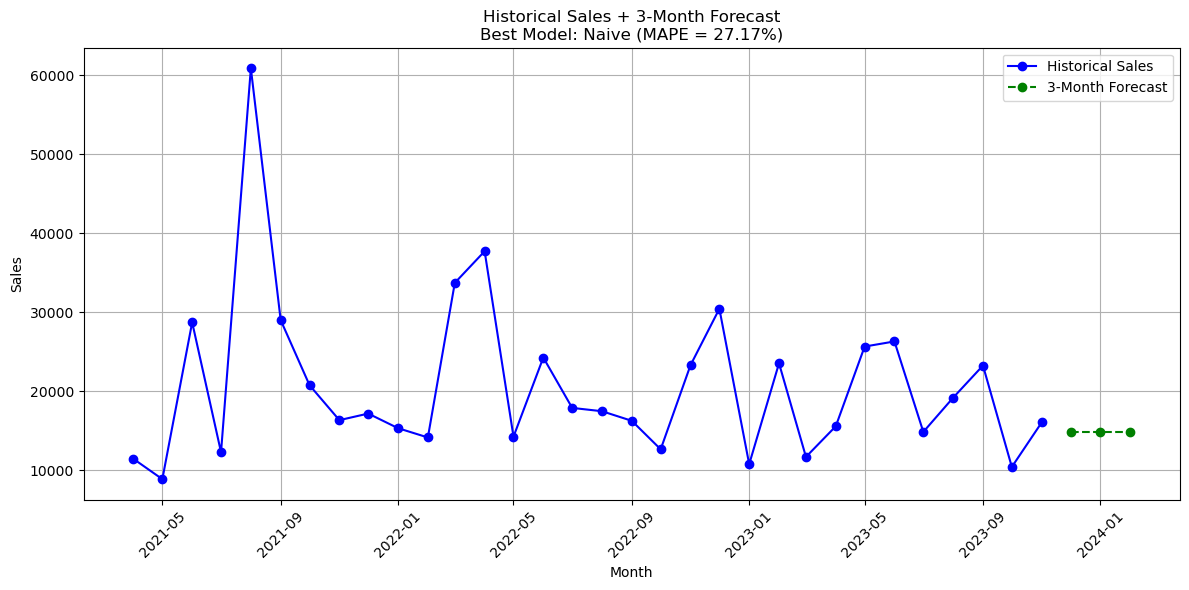

In [198]:
# Add best MAPE to the plot title
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Historical Sales', marker='o', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='3-Month Forecast', marker='o', color='green', linestyle='--')

# Add best MAPE to the title
plt.title(f"Historical Sales + 3-Month Forecast\nBest Model: {best_model} (MAPE = {results[best_model]:.2f}%)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# for 3rd material


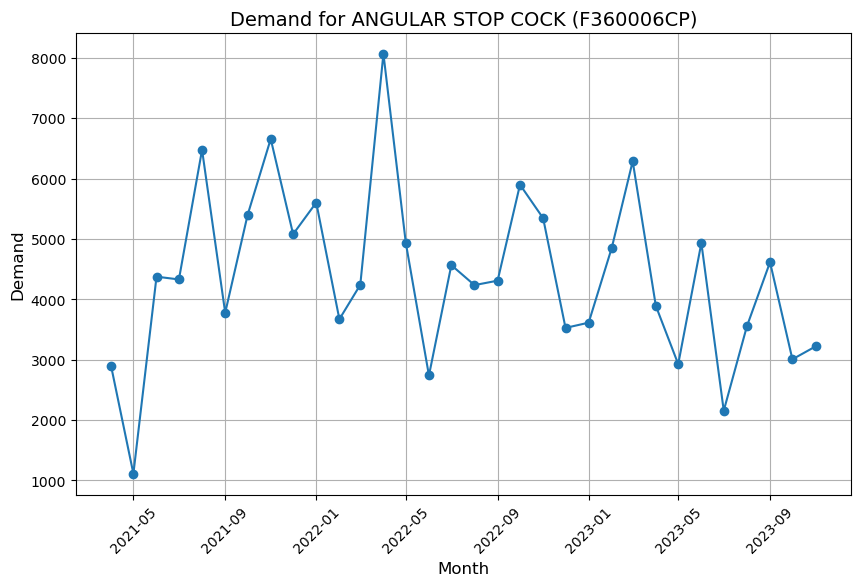

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Defining the dataset
data = {
    "Month": [
        "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
        "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
        "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
    ],
    "F360006CP": [
        2903, 1112, 4377, 4331, 6478, 3779, 5398, 6659, 5081, 5605, 3672, 4242, 8071, 4937, 2740, 4568, 4237, 4311, 5901, 5346,
        3528, 3615, 4857, 6289, 3893, 2928, 4935, 2156, 3554, 4617, 3008, 3221
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%b %y')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['F360006CP'], marker='o')
plt.title('Demand for ANGULAR STOP COCK (F360006CP)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Demand', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


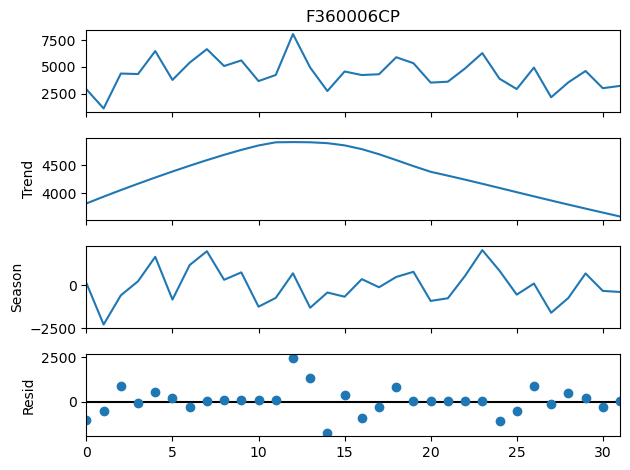

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Defining the dataset
data = {
    "Month": [
        "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
        "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
        "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
    ],
    "F360006CP": [
        2903, 1112, 4377, 4331, 6478, 3779, 5398, 6659, 5081, 5605, 3672, 4242, 8071, 4937, 2740, 4568, 4237, 4311, 5901, 5346,
        3528, 3615, 4857, 6289, 3893, 2928, 4935, 2156, 3554, 4617, 3008, 3221
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%b %y')

# Applying STL Decomposition
stl = STL(df['F360006CP'], period=12)  # Using a period of 12 for monthly seasonality
result = stl.fit()

# Plotting the STL Decomposition components
result.plot()
plt.show()


In [201]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
adf_result = adfuller(df['F360006CP'])

# Extracting the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
used_lag = adf_result[2]
num_observations = adf_result[3]
critical_values = adf_result[4]

# Display results
print(f"ADF Statistic: {adf_statistic}")
print(f"P-Value: {p_value}")
print(f"Lag Used: {used_lag}")
print(f"Number of Observations Used: {num_observations}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"\t{key}: {value}")

# Interpretation
if p_value < 0.05:
    print("The series is stationary (reject H0).")
else:
    print("The series is not stationary (fail to reject H0).")


ADF Statistic: -0.21170125799926953
P-Value: 0.937112409976026
Lag Used: 6
Number of Observations Used: 25
Critical Values:
	1%: -3.7238633119999998
	5%: -2.98648896
	10%: -2.6328004
The series is not stationary (fail to reject H0).


In [202]:
# 1st Order Differencing
df['F360006CP_diff1'] = df['F360006CP'].diff().dropna()

# Drop the first NaN value after differencing
diff_series = df['F360006CP_diff1'].dropna()

# ADF Test on differenced data
adf_result_diff = adfuller(diff_series)

# Results
print(f"ADF Statistic (1st difference): {adf_result_diff[0]}")
print(f"P-Value: {adf_result_diff[1]}")
print("Critical Values:")
for key, value in adf_result_diff[4].items():
    print(f"\t{key}: {value}")

# Interpretation
if adf_result_diff[1] < 0.05:
    print("The differenced series is stationary (reject H0).")
else:
    print("The differenced series is not stationary (fail to reject H0).")


ADF Statistic (1st difference): -4.0464302094650835
P-Value: 0.0011859814223586934
Critical Values:
	1%: -3.7238633119999998
	5%: -2.98648896
	10%: -2.6328004
The differenced series is stationary (reject H0).


In [203]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test on original data
lb_original = acorr_ljungbox(df['F360006CP'], lags=[10], return_df=True)

# Ljung-Box test on 1st differenced data
lb_diff = acorr_ljungbox(df['F360006CP_diff1'].dropna(), lags=[10], return_df=True)

# Results
print("Ljung-Box Test on Original Data:")
print(lb_original)

print("\nLjung-Box Test on 1st Differenced Data:")
print(lb_diff)

# Interpretation
print("\nInterpretation:")
if lb_original['lb_pvalue'].values[0] < 0.05:
    print("Original series is NOT white noise (reject H0).")
else:
    print("Original series MAY BE white noise (fail to reject H0).")

if lb_diff['lb_pvalue'].values[0] < 0.05:
    print("Differenced series is NOT white noise (reject H0).")
else:
    print("Differenced series MAY BE white noise (fail to reject H0).")


Ljung-Box Test on Original Data:
     lb_stat  lb_pvalue
10  4.947183   0.894678

Ljung-Box Test on 1st Differenced Data:
      lb_stat  lb_pvalue
10  10.473806   0.399953

Interpretation:
Original series MAY BE white noise (fail to reject H0).
Differenced series MAY BE white noise (fail to reject H0).


In [204]:
# 2nd order differencing
df['F360006CP_diff2'] = df['F360006CP_diff1'].diff()

# Drop NaN values
diff2_series = df['F360006CP_diff2'].dropna()

# Ljung-Box test on 2nd differenced series
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_diff2 = acorr_ljungbox(diff2_series, lags=[10], return_df=True)

# Display results
print("Ljung-Box Test on 2nd Order Differenced Data:")
print(lb_diff2)

# Interpretation
print("\nInterpretation:")
if lb_diff2['lb_pvalue'].values[0] < 0.05:
    print("2nd differenced series is NOT white noise (reject H0).")
else:
    print("2nd differenced series MAY BE white noise (fail to reject H0).")


Ljung-Box Test on 2nd Order Differenced Data:
      lb_stat  lb_pvalue
10  15.930237   0.101647

Interpretation:
2nd differenced series MAY BE white noise (fail to reject H0).


In [205]:
from scipy.stats import boxcox
from statsmodels.stats.diagnostic import acorr_ljungbox

# Box-Cox transformation (add small constant to avoid zero/negative values if needed)
df['F360006CP_boxcox'], lambda_bc = boxcox(df['F360006CP'])

# Ljung-Box test on Box-Cox transformed data
lb_boxcox = acorr_ljungbox(df['F360006CP_boxcox'], lags=[10], return_df=True)

# Results
print("Ljung-Box Test on Box-Cox Transformed Data:")
print(lb_boxcox)

# Interpretation
print("\nInterpretation:")
if lb_boxcox['lb_pvalue'].values[0] < 0.05:
    print("Box-Cox transformed series is NOT white noise (reject H0).")
else:
    print("Box-Cox transformed series MAY BE white noise (fail to reject H0).")

# Optional: print lambda used for Box-Cox
print(f"\nBox-Cox lambda: {lambda_bc}")


Ljung-Box Test on Box-Cox Transformed Data:
     lb_stat  lb_pvalue
10  4.661638   0.912606

Interpretation:
Box-Cox transformed series MAY BE white noise (fail to reject H0).

Box-Cox lambda: 0.8231487455071258


In [206]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Split data
train = df['F360006CP'][:-4]
test = df['F360006CP'][-4:]

# Mean forecasting
mean_forecast_value = train.mean()
forecast_mean = np.array([mean_forecast_value] * 4)

# Evaluate MAPE
mape_mean = mean_absolute_percentage_error(test, forecast_mean) * 100

# Output
print(f"Mean Forecast Values (next 4 months): {forecast_mean}")
print(f"MAPE (Mean Forecasting): {mape_mean:.2f}%")


Mean Forecast Values (next 4 months): [4498.17857143 4498.17857143 4498.17857143 4498.17857143]
MAPE (Mean Forecasting): 29.58%


In [207]:
forecast_next_3 = np.array([mean_forecast_value] * 3)
print(f"\nForecast for next 3 months using Mean Forecasting: {forecast_next_3}")



Forecast for next 3 months using Mean Forecasting: [4498.17857143 4498.17857143 4498.17857143]


In [208]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the data
data = {
    "Month": [
        "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
        "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
        "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
    ],
    "F360006CP": [
        2903, 1112, 4377, 4331, 6478, 3779, 5398, 6659, 5081, 5605, 3672, 4242, 8071, 4937, 2740, 4568, 4237, 4311, 5901, 5346,
        3528, 3615, 4857, 6289, 3893, 2928, 4935, 2156, 3554, 4617, 3008, 3221
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%b %y')
df.set_index('Month', inplace=True)

# Split data: last 4 months for test, forecast next 3 months
train = df.iloc[:-4]['F360006CP']
test = df.iloc[-4:]['F360006CP']

# Store results
results = {}

# ----------------------------
# 1. Mean Forecasting
mean_value = train.mean()
forecast_mean = [mean_value] * 4
mape_mean = mean_absolute_percentage_error(test, forecast_mean) * 100
results['Mean'] = {'MAPE': mape_mean, 'Forecast': [mean_value] * 3}

# ----------------------------
# 2. Holt-Winters (Triple Exponential Smoothing)
try:
    model_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
    forecast_hw = model_hw.forecast(4)
    mape_hw = mean_absolute_percentage_error(test, forecast_hw) * 100
    results['Holt-Winters'] = {'MAPE': mape_hw, 'Forecast': model_hw.forecast(3).tolist()}
except Exception as e:
    results['Holt-Winters'] = {'MAPE': None, 'Forecast': str(e)}

# ----------------------------
# 3. ARIMA
try:
    model_arima = ARIMA(train, order=(1,1,1)).fit()
    forecast_arima = model_arima.forecast(4)
    mape_arima = mean_absolute_percentage_error(test, forecast_arima) * 100
    results['ARIMA'] = {'MAPE': mape_arima, 'Forecast': model_arima.forecast(3).tolist()}
except Exception as e:
    results['ARIMA'] = {'MAPE': None, 'Forecast': str(e)}

# ----------------------------
# 4. SARIMAX
try:
    model_sarimax = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
    forecast_sarimax = model_sarimax.forecast(4)
    mape_sarimax = mean_absolute_percentage_error(test, forecast_sarimax) * 100
    results['SARIMAX'] = {'MAPE': mape_sarimax, 'Forecast': model_sarimax.forecast(3).tolist()}
except Exception as e:
    results['SARIMAX'] = {'MAPE': None, 'Forecast': str(e)}

# ----------------------------
# 5. Random Forest Regressor
try:
    df_rf = df.copy()
    df_rf['t'] = np.arange(len(df_rf))
    X = df_rf[['t']].iloc[:-4]
    y = df_rf['F360006CP'].iloc[:-4]
    model_rf = RandomForestRegressor().fit(X, y)
    future_rf = [[len(df_rf)+i] for i in range(3)]
    forecast_rf = model_rf.predict(X.iloc[-4:])  # 4-month test prediction
    mape_rf = mean_absolute_percentage_error(test, forecast_rf) * 100
    forecast_next_rf = model_rf.predict(future_rf)
    results['Random Forest'] = {'MAPE': mape_rf, 'Forecast': forecast_next_rf.tolist()}
except Exception as e:
    results['Random Forest'] = {'MAPE': None, 'Forecast': str(e)}

# ----------------------------
# 6. XGBoost Regressor
try:
    model_xgb = XGBRegressor(n_estimators=50)  # Limiting boosting rounds to avoid timeout
    model_xgb.fit(X, y)
    forecast_xgb = model_xgb.predict(X.iloc[-4:])
    mape_xgb = mean_absolute_percentage_error(test, forecast_xgb) * 100
    forecast_next_xgb = model_xgb.predict(future_rf)
    results['XGBoost'] = {'MAPE': mape_xgb, 'Forecast': forecast_next_xgb.tolist()}
except Exception as e:
    results['XGBoost'] = {'MAPE': None, 'Forecast': str(e)}

# Print results
print(results)


{'Mean': {'MAPE': 29.583084102120775, 'Forecast': [np.float64(4498.178571428572), np.float64(4498.178571428572), np.float64(4498.178571428572)]}, 'Holt-Winters': {'MAPE': 47.92289659631294, 'Forecast': [4342.338999160347, 3854.9492051780107, 5186.645750569328]}, 'ARIMA': {'MAPE': 13.93069148297195, 'Forecast': [3576.9946459352896, 3634.036073720385, 3636.325825123087]}, 'SARIMAX': {'MAPE': 38.625472691222, 'Forecast': [3916.8884276654744, 955.5242076301996, 1615.5818897992135]}, 'Random Forest': {'MAPE': 24.568781353966003, 'Forecast': [3044.57, 3044.57, 3044.57]}, 'XGBoost': {'MAPE': 35.56314408779144, 'Forecast': [2163.516845703125, 2163.516845703125, 2163.516845703125]}}


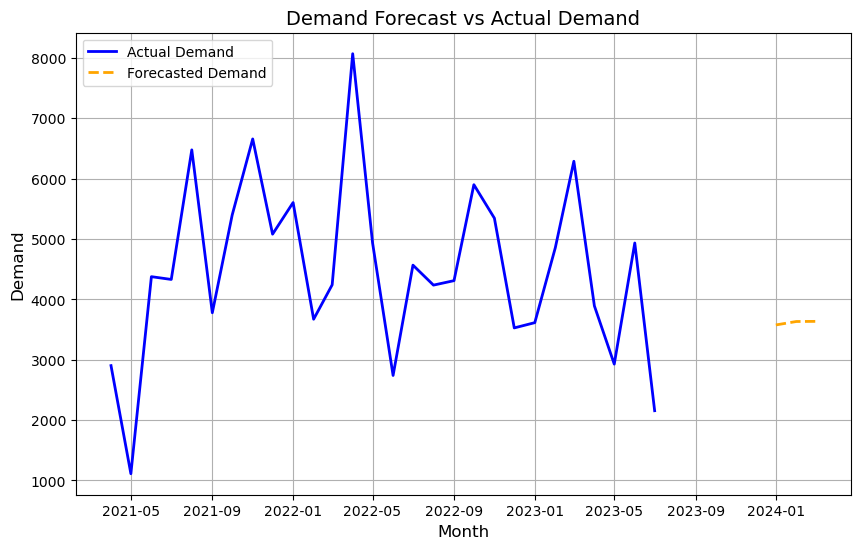

In [209]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the data (same as before)
data = {
    "Month": [
        "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
        "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
        "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
    ],
    "F360006CP": [
        2903, 1112, 4377, 4331, 6478, 3779, 5398, 6659, 5081, 5605, 3672, 4242, 8071, 4937, 2740, 4568, 4237, 4311, 5901, 5346,
        3528, 3615, 4857, 6289, 3893, 2928, 4935, 2156, 3554, 4617, 3008, 3221
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%b %y')
df.set_index('Month', inplace=True)

# Split data: last 4 months for test, forecast next 3 months
train = df.iloc[:-4]['F360006CP']
test = df.iloc[-4:]['F360006CP']

# Assume we have forecast data from the ARIMA model (you can replace it with your actual forecast results)
forecast_arima = [3576.99, 3634.04, 3636.33]  # Replace with your forecast from ARIMA or any other model

# Plotting the data
plt.figure(figsize=(10,6))

# Plot actual data
plt.plot(df.index[:-4], train, label='Actual Demand', color='blue', linewidth=2)

# Plot forecast data (next 3 months)
forecast_dates = pd.date_range(df.index[-1], periods=4, freq='M')[1:]  # Next 3 months forecast
plt.plot(forecast_dates, forecast_arima, label='Forecasted Demand', color='orange', linestyle='--', linewidth=2)

# Adding titles and labels
plt.title("Demand Forecast vs Actual Demand", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Demand", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

# Display the plot
plt.show()


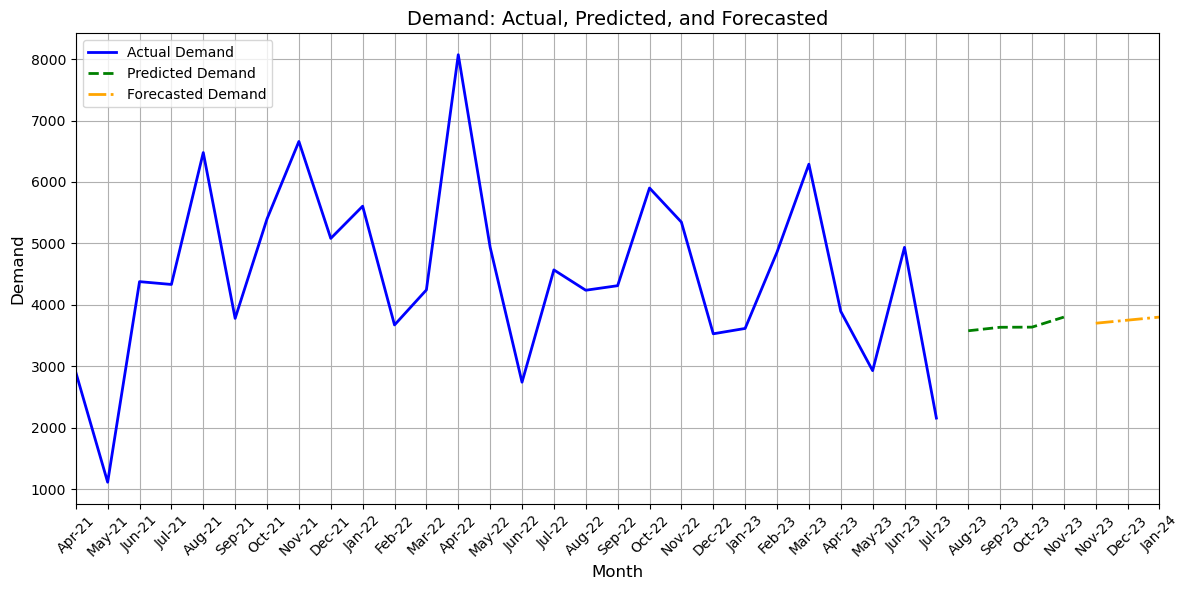

In [210]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the data
data = {
    "Month": [
        "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
        "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
        "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
    ],
    "F360006CP": [
        2903, 1112, 4377, 4331, 6478, 3779, 5398, 6659, 5081, 5605, 3672, 4242, 8071, 4937, 2740, 4568, 4237, 4311, 5901, 5346,
        3528, 3615, 4857, 6289, 3893, 2928, 4935, 2156, 3554, 4617, 3008, 3221
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%b %y')

# Split data: last 4 months for test, forecast next 3 months
train = df.iloc[:-4]['F360006CP']
test = df.iloc[-4:]['F360006CP']

# Example predicted and forecasted values
predicted_arima = [3576.99, 3634.04, 3636.33, 3800.0]  # for the test months
forecast_arima = [3700.0, 3750.0, 3800.0]  # for future months

# Create a combined X axis
full_x = np.arange(len(df))  # For actual data
pred_x = np.arange(len(df) - 4, len(df))  # For predicted points
forecast_x = np.arange(len(df), len(df) + 3)  # For forecasted points

# Combine month labels
month_labels = list(df['Month'].dt.strftime('%b-%y'))  # Existing months
# Add future forecast month labels
last_month = df['Month'].iloc[-1]
future_months = pd.date_range(last_month + pd.offsets.MonthEnd(1), periods=3, freq='M')
future_labels = list(future_months.strftime('%b-%y'))
all_labels = month_labels + future_labels

# Plotting
plt.figure(figsize=(12,6))

plt.plot(full_x[:-4], train, label='Actual Demand', color='blue', linewidth=2)
plt.plot(pred_x, predicted_arima, label='Predicted Demand', color='green', linestyle='--', linewidth=2)
plt.plot(forecast_x, forecast_arima, label='Forecasted Demand', color='orange', linestyle='-.', linewidth=2)

# Formatting x-axis
plt.xticks(ticks=np.arange(len(all_labels)), labels=all_labels, rotation=45)
plt.xlim(0, len(all_labels)-1)

# Adding titles and labels
plt.title("Demand: Actual, Predicted, and Forecasted", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Demand", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


# 4TH MATERIAL

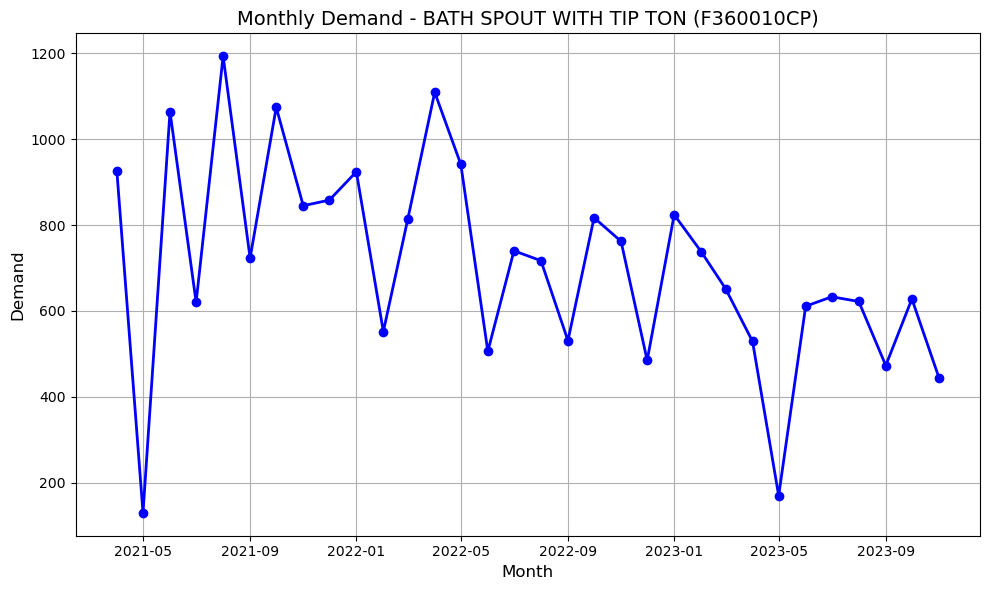

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    "Month": [
        "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
        "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
        "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
    ],
    "F360010CP": [
        925, 130, 1064, 620, 1193, 723, 1074, 845, 858, 924, 552, 813, 1109, 941, 506, 740, 717, 531, 817, 762,
        485, 824, 738, 652, 529, 170, 611, 633, 622, 473, 628, 445
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
df["Month"] = pd.to_datetime(df["Month"], format="%b %y")
df.set_index("Month", inplace=True)

# Plotting the time series
plt.figure(figsize=(10,6))
plt.plot(df.index, df["F360010CP"], marker='o', color='blue', linewidth=2)
plt.title("Monthly Demand - BATH SPOUT WITH TIP TON (F360010CP)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Demand", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

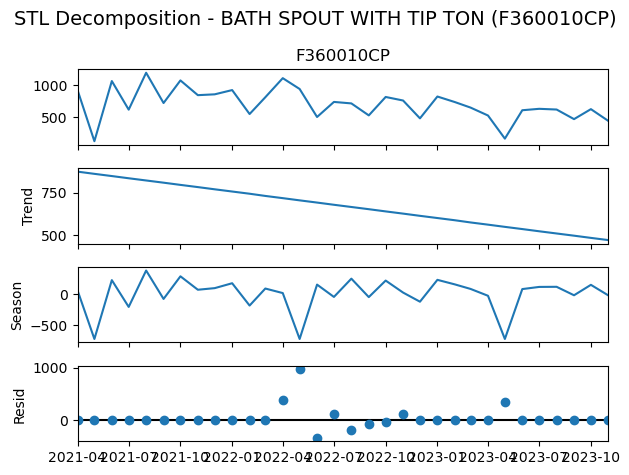

In [212]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# STL decomposition (assuming df is already created and 'F360010CP' is the column)
series = df["F360010CP"]
stl = STL(series, period=12, robust=True)
result = stl.fit()

# Plot the STL decomposition
plt.figure(figsize=(10,8))
result.plot()
plt.suptitle("STL Decomposition - BATH SPOUT WITH TIP TON (F360010CP)", fontsize=14)
plt.tight_layout()
plt.show()


In [213]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(df["F360010CP"])

# Display results
print("ADF Test Results:")
print(f"ADF Statistic  : {adf_result[0]:.4f}")
print(f"p-value        : {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")

# Interpretation
if adf_result[1] <= 0.05:
    print("\n✅ The series is stationary (reject H0).")
else:
    print("\n❌ The series is non-stationary (fail to reject H0).")


ADF Test Results:
ADF Statistic  : -5.5784
p-value        : 0.0000
Critical Values:
   1%: -3.6614
   5%: -2.9605
   10%: -2.6193

✅ The series is stationary (reject H0).


In [214]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test on the raw series
ljung_result = acorr_ljungbox(df["F360010CP"], lags=[10], return_df=True)

print("Ljung-Box Test Results (lag=10):")
print(ljung_result)

# Interpretation
p_value = ljung_result['lb_pvalue'].values[0]
if p_value > 0.05:
    print("\n✅ Residuals resemble white noise (fail to reject H0).")
else:
    print("\n❌ Residuals show autocorrelation (reject H0).")


Ljung-Box Test Results (lag=10):
    lb_stat  lb_pvalue
10  9.53943   0.481785

✅ Residuals resemble white noise (fail to reject H0).


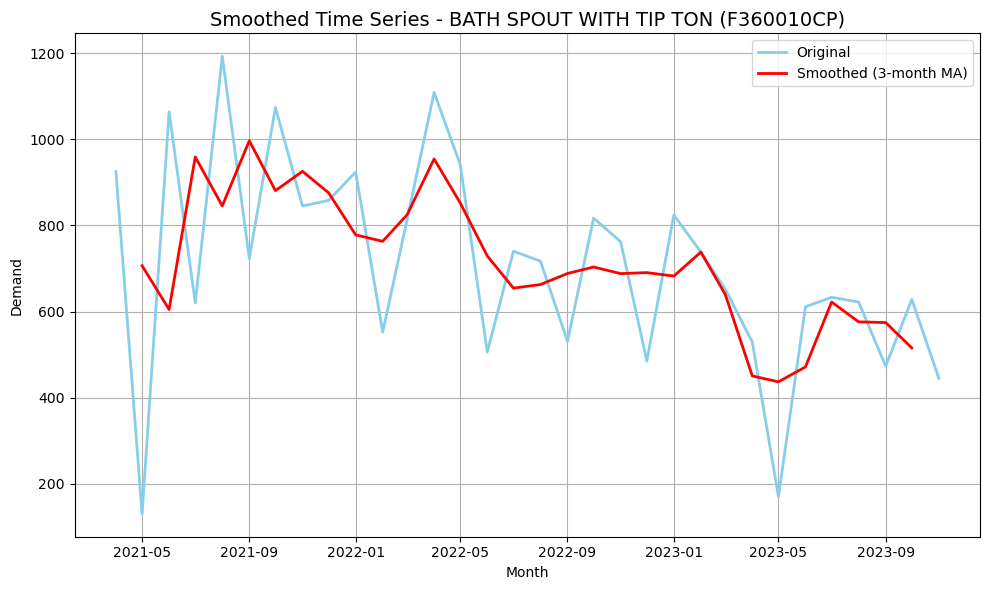

In [215]:
# Apply 3-month moving average smoothing
df["Smoothed"] = df["F360010CP"].rolling(window=3, center=True).mean()

# Plot original and smoothed series
plt.figure(figsize=(10,6))
plt.plot(df.index, df["F360010CP"], label="Original", color="skyblue", linewidth=2)
plt.plot(df.index, df["Smoothed"], label="Smoothed (3-month MA)", color="red", linewidth=2)
plt.title("Smoothed Time Series - BATH SPOUT WITH TIP TON (F360010CP)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [216]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Drop NaNs from smoothed series
smoothed_series = df["Smoothed"].dropna()

# Ljung-Box test on smoothed series
ljung_smoothed = acorr_ljungbox(smoothed_series, lags=[10], return_df=True)

print("Ljung-Box Test Results on Smoothed Series (lag=10):")
print(ljung_smoothed)

# Interpretation
p_value = ljung_smoothed['lb_pvalue'].values[0]
if p_value > 0.05:
    print("\n✅ Noise is reduced: residuals resemble white noise.")
else:
    print("\n❌ Still some autocorrelation: noise persists.")



Ljung-Box Test Results on Smoothed Series (lag=10):
      lb_stat     lb_pvalue
10  50.833604  1.874328e-07

❌ Still some autocorrelation: noise persists.


In [217]:
import pandas as pd

# Monthly demand data
months = [
    "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
    "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
    "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
]
values = [
    925, 130, 1064, 620, 1193, 723, 1074, 845, 858, 924, 552, 813, 1109, 941, 506, 740,
    717, 531, 817, 762, 485, 824, 738, 652, 529, 170, 611, 633, 622, 473, 628, 445
]

# Create DataFrame
df = pd.DataFrame({"Month": pd.to_datetime(months, format="%b %y"), "Demand": values})
df.set_index("Month", inplace=True)


In [218]:
# Define training and test split
train = df.iloc[:-4]
test = df.iloc[-4:]


In [219]:
# Forecast using mean of training set
mean_forecast_value = train["Demand"].mean()
forecast = [mean_forecast_value] * 3  # Next 3 months

print("Forecast (Next 3 months):", forecast)


Forecast (Next 3 months): [np.float64(731.6428571428571), np.float64(731.6428571428571), np.float64(731.6428571428571)]


In [220]:
results = {
    "Mean": {
        "MAPE": mape,
        "Forecast": forecast
    }
}
print(results)


{'Mean': {'MAPE': 38.37845134646592, 'Forecast': [np.float64(731.6428571428571), np.float64(731.6428571428571), np.float64(731.6428571428571)]}}


In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from datetime import timedelta

# Step 1: Data Setup
months = [
    "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
    "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
    "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
]
values = [
    925, 130, 1064, 620, 1193, 723, 1074, 845, 858, 924, 552, 813, 1109, 941, 506, 740,
    717, 531, 817, 762, 485, 824, 738, 652, 529, 170, 611, 633, 622, 473, 628, 445
]

df = pd.DataFrame({"Month": pd.to_datetime(months, format="%b %y"), "Demand": values})
df.set_index("Month", inplace=True)

train = df.iloc[:-4]
test = df.iloc[-4:]
y_train, y_test = train["Demand"], test["Demand"].iloc[:3]

results = {}

# Step 2: Mean Forecast
mean_val = y_train.mean()
results['Mean'] = {
    "MAPE": mean_absolute_percentage_error(y_test, [mean_val]*3) * 100,
    "Forecast": [mean_val]*3
}

# Step 3: Holt-Winters
try:
    hw_model = ExponentialSmoothing(y_train, seasonal="add", seasonal_periods=12).fit()
    hw_forecast = hw_model.forecast(3)
    results['Holt-Winters'] = {
        "MAPE": mean_absolute_percentage_error(y_test, hw_forecast) * 100,
        "Forecast": hw_forecast.tolist()
    }
except Exception as e:
    results['Holt-Winters'] = {"Error": str(e)}

# Step 4: ARIMA
try:
    arima_model = ARIMA(y_train, order=(1,1,1)).fit()
    arima_forecast = arima_model.forecast(3)
    results['ARIMA'] = {
        "MAPE": mean_absolute_percentage_error(y_test, arima_forecast) * 100,
        "Forecast": arima_forecast.tolist()
    }
except Exception as e:
    results['ARIMA'] = {"Error": str(e)}

# Step 5: SARIMAX
try:
    sarimax_model = SARIMAX(y_train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
    sarimax_forecast = sarimax_model.forecast(3)
    results['SARIMAX'] = {
        "MAPE": mean_absolute_percentage_error(y_test, sarimax_forecast) * 100,
        "Forecast": sarimax_forecast.tolist()
    }
except Exception as e:
    results['SARIMAX'] = {"Error": str(e)}

# Step 6: Random Forest
try:
    rf = RandomForestRegressor()
    X_train = np.arange(len(y_train)).reshape(-1, 1)
    rf.fit(X_train, y_train)
    X_forecast = np.arange(len(y_train), len(y_train)+3).reshape(-1, 1)
    rf_forecast = rf.predict(X_forecast)
    results['Random Forest'] = {
        "MAPE": mean_absolute_percentage_error(y_test, rf_forecast) * 100,
        "Forecast": rf_forecast.tolist()
    }
except Exception as e:
    results['Random Forest'] = {"Error": str(e)}

# Step 7: XGBoost
try:
    xg = xgb.XGBRegressor(objective="reg:squarederror")
    xg.fit(X_train, y_train)
    xg_forecast = xg.predict(X_forecast)
    results['XGBoost'] = {
        "MAPE": mean_absolute_percentage_error(y_test, xg_forecast) * 100,
        "Forecast": xg_forecast.tolist()
    }
except Exception as e:
    results['XGBoost'] = {"Error": str(e)}

# Step 8: Show Results
import pprint
pprint.pprint(results)


{'ARIMA': {'Forecast': [532.7940097698706,
                        567.0110042430172,
                        555.3270449498998],
           'MAPE': 15.263134085616628},
 'Holt-Winters': {'Forecast': [784.3501532751598,
                               484.6852646307372,
                               829.0703003860733],
                  'MAPE': 20.196444070106633},
 'Mean': {'Forecast': [np.float64(731.6428571428571),
                       np.float64(731.6428571428571),
                       np.float64(731.6428571428571)],
          'MAPE': 29.60415793764646},
 'Random Forest': {'Forecast': [585.7, 585.7, 585.7],
                   'MAPE': 12.13277337644884},
 'SARIMAX': {'Forecast': [779.6017124754138,
                          723.7519262802944,
                          672.652389671699],
             'MAPE': 28.487080421884542},
 'XGBoost': {'Forecast': [632.9971313476562,
                          632.9971313476562,
                          632.9971313476562],
             'MAP

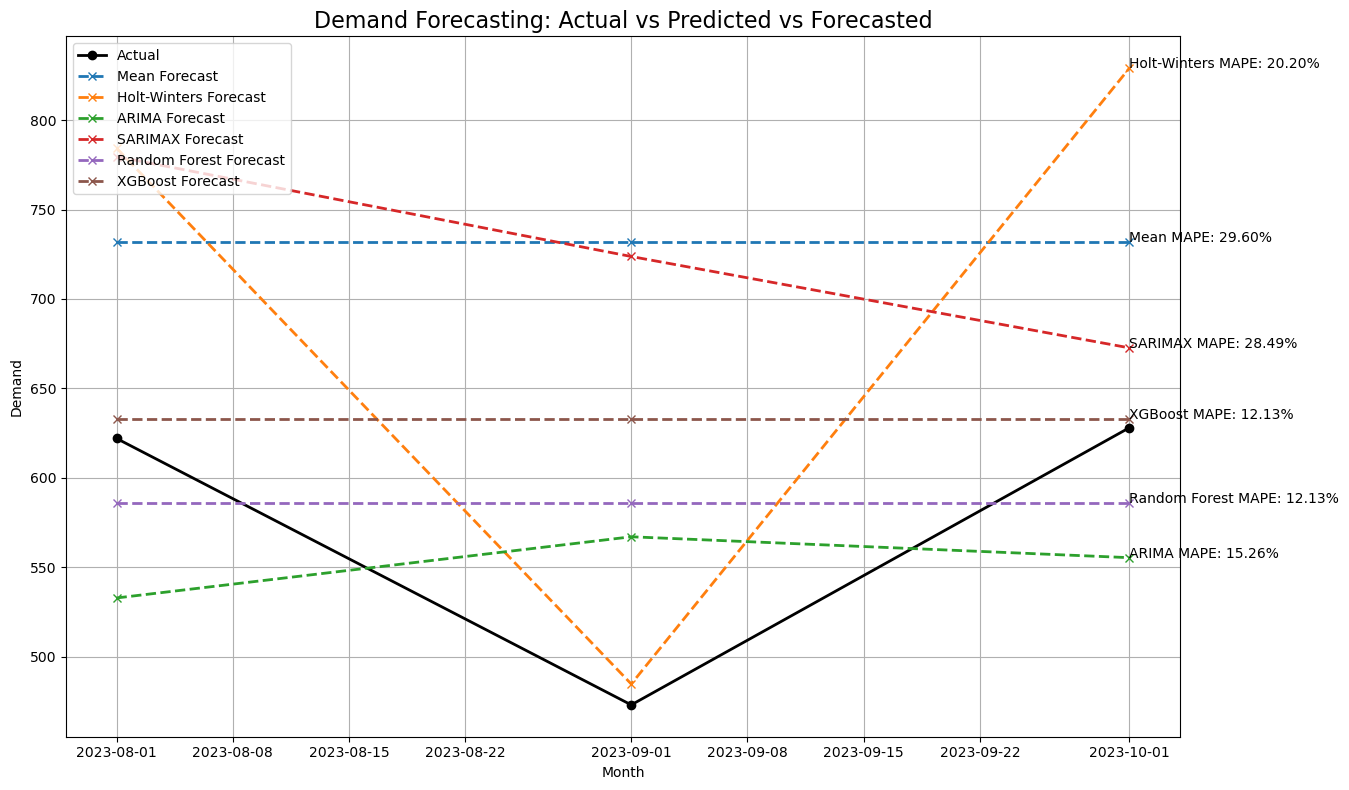

In [222]:
import matplotlib.pyplot as plt

# Prepare a DataFrame to store actual, predicted and forecast values
forecast_df = pd.DataFrame({
    "Month": test.index[:3],
    "Actual": y_test[:3]
})

# Add forecast values for each model
for model, result in results.items():
    if 'Error' not in result:
        forecast_df[model] = result['Forecast'][:3]

# Plot Actual vs Predicted vs Forecasted for all models
plt.figure(figsize=(12, 8))

plt.plot(forecast_df["Month"], forecast_df["Actual"], label="Actual", color='black', marker='o', linestyle='-', linewidth=2)
for model, result in results.items():
    if 'Error' not in result:
        plt.plot(forecast_df["Month"], forecast_df[model], label=f"{model} Forecast", marker='x', linestyle='--', linewidth=2)

plt.title("Demand Forecasting: Actual vs Predicted vs Forecasted", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Demand")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()

# Show MAPE for each model on the plot
for model, result in results.items():
    if 'Error' not in result:
        mape_value = result["MAPE"]
        plt.text(forecast_df["Month"].iloc[2], forecast_df[model].iloc[2], f"{model} MAPE: {mape_value:.2f}%", 
                 horizontalalignment='left', color="black", fontsize=10)

plt.show()


Mean - MAPE: 29.60%
Forecast for next 3 months: [np.float64(731.6428571428571), np.float64(731.6428571428571), np.float64(731.6428571428571)]

Holt-Winters - MAPE: 17.03%
Forecast for next 3 months: 2023-08-01    753.672107
2023-09-01    446.645359
2023-10-01    780.884491
Freq: MS, dtype: float64

ARIMA - MAPE: 15.26%
Forecast for next 3 months: 2023-08-01    532.794010
2023-09-01    567.011004
2023-10-01    555.327045
Freq: MS, Name: predicted_mean, dtype: float64

SARIMA - MAPE: 28.49%
Forecast for next 3 months: 2023-08-01    779.601712
2023-09-01    723.751926
2023-10-01    672.652390
Freq: MS, Name: predicted_mean, dtype: float64



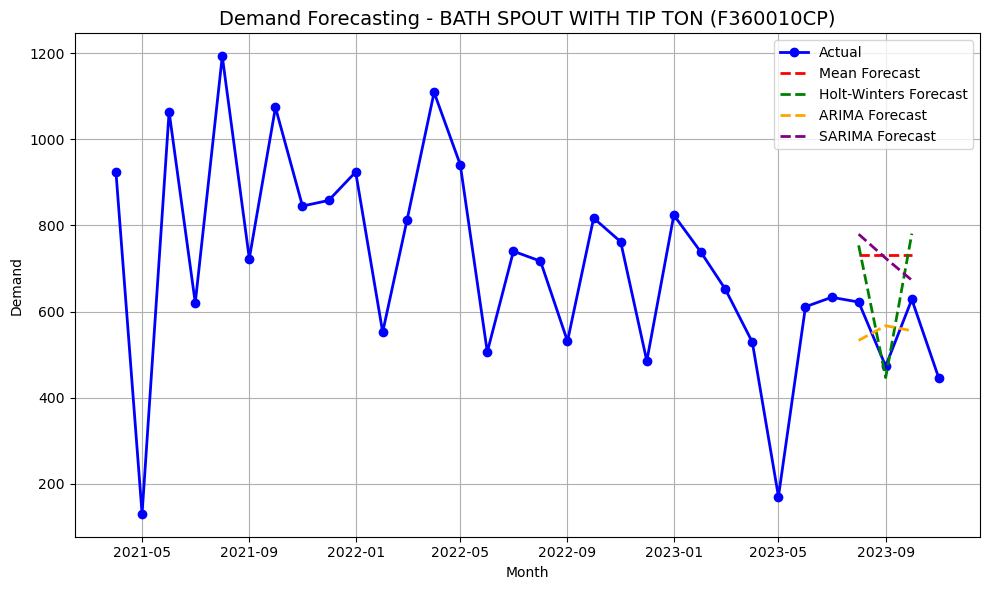

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

# 1. Define the data
months = [
    "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
    "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
    "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
]
values = [
    925, 130, 1064, 620, 1193, 723, 1074, 845, 858, 924, 552, 813, 1109, 941, 506, 740,
    717, 531, 817, 762, 485, 824, 738, 652, 529, 170, 611, 633, 622, 473, 628, 445
]

# Create DataFrame
df = pd.DataFrame({"Month": pd.to_datetime(months, format="%b %y"), "Demand": values})
df.set_index("Month", inplace=True)

# 2. Split into Train and Test sets (Test size = 4 months, Forecast period = 3 months)
train = df.iloc[:-4]
test = df.iloc[-4:]

# 3. Mean Forecasting Model
mean_forecast_value = train["Demand"].mean()
mean_forecast = [mean_forecast_value] * 3  # Forecast next 3 months

# 4. Holt-Winters Exponential Smoothing Model
holt_winters_model = ExponentialSmoothing(train["Demand"], trend="add", seasonal="add", seasonal_periods=12)
holt_winters_fit = holt_winters_model.fit()
holt_winters_forecast = holt_winters_fit.forecast(steps=3)

# 5. ARIMA Model
arima_model = ARIMA(train["Demand"], order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=3)

# 6. SARIMA Model
sarima_model = SARIMAX(train["Demand"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=3)

# 7. Evaluate the models using MAPE
def evaluate_model(forecast, actual):
    return mean_absolute_percentage_error(actual, forecast) * 100

mean_mape = evaluate_model(mean_forecast, test["Demand"].iloc[:3])
holt_winters_mape = evaluate_model(holt_winters_forecast, test["Demand"].iloc[:3])
arima_mape = evaluate_model(arima_forecast, test["Demand"].iloc[:3])
sarima_mape = evaluate_model(sarima_forecast, test["Demand"].iloc[:3])

# 8. Results Summary
results = {
    "Mean": {"MAPE": mean_mape, "Forecast": mean_forecast},
    "Holt-Winters": {"MAPE": holt_winters_mape, "Forecast": holt_winters_forecast},
    "ARIMA": {"MAPE": arima_mape, "Forecast": arima_forecast},
    "SARIMA": {"MAPE": sarima_mape, "Forecast": sarima_forecast}
}

# Print the MAPE and Forecast results for each model
for model_name, result in results.items():
    print(f"{model_name} - MAPE: {result['MAPE']:.2f}%")
    print(f"Forecast for next 3 months: {result['Forecast']}\n")

# 9. Plotting the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Demand"], label="Actual", color="blue", marker='o', linewidth=2)
plt.plot(test.index[:3], mean_forecast, label="Mean Forecast", color="red", linestyle="--", linewidth=2)
plt.plot(test.index[:3], holt_winters_forecast, label="Holt-Winters Forecast", color="green", linestyle="--", linewidth=2)
plt.plot(test.index[:3], arima_forecast, label="ARIMA Forecast", color="orange", linestyle="--", linewidth=2)
plt.plot(test.index[:3], sarima_forecast, label="SARIMA Forecast", color="purple", linestyle="--", linewidth=2)

plt.title("Demand Forecasting - BATH SPOUT WITH TIP TON (F360010CP)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


MAPE for Mean: 29.60415793764646
MAPE for ARIMA: 15.263134085616628
MAPE for Holt-Winters: 17.028539617346457


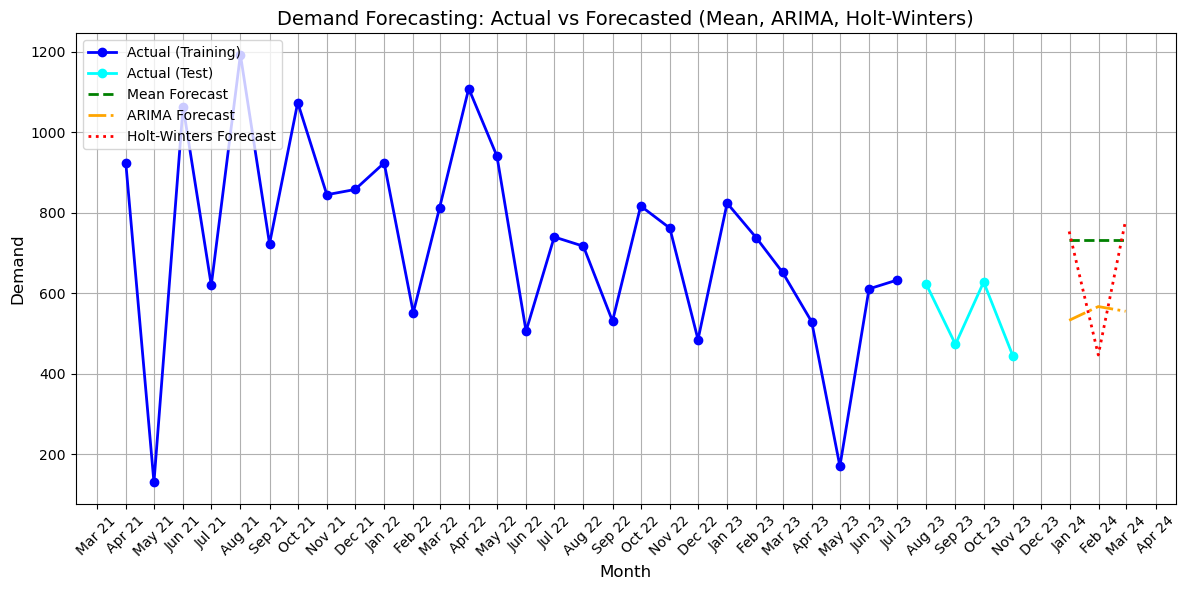

{'Mean': {'MAPE': 29.60415793764646,
  'Forecast': [np.float64(731.6428571428571),
   np.float64(731.6428571428571),
   np.float64(731.6428571428571)]},
 'ARIMA': {'MAPE': 15.263134085616628,
  'Forecast': 2023-08-01    532.794010
  2023-09-01    567.011004
  2023-10-01    555.327045
  Freq: MS, Name: predicted_mean, dtype: float64},
 'Holt-Winters': {'MAPE': 17.028539617346457,
  'Forecast': 2023-08-01    753.672107
  2023-09-01    446.645359
  2023-10-01    780.884491
  Freq: MS, dtype: float64}}

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib.dates import DateFormatter, MonthLocator

# Data Preparation
months = [
    "Apr 21", "May 21", "Jun 21", "Jul 21", "Aug 21", "Sep 21", "Oct 21", "Nov 21", "Dec 21",
    "Jan 22", "Feb 22", "Mar 22", "Apr 22", "May 22", "Jun 22", "Jul 22", "Aug 22", "Sep 22", "Oct 22", "Nov 22", "Dec 22",
    "Jan 23", "Feb 23", "Mar 23", "Apr 23", "May 23", "Jun 23", "Jul 23", "Aug 23", "Sep 23", "Oct 23", "Nov 23"
]
values = [
    925, 130, 1064, 620, 1193, 723, 1074, 845, 858, 924, 552, 813, 1109, 941, 506, 740,
    717, 531, 817, 762, 485, 824, 738, 652, 529, 170, 611, 633, 622, 473, 628, 445
]

# Create DataFrame
df = pd.DataFrame({"Month": pd.to_datetime(months, format="%b %y"), "Demand": values})
df.set_index("Month", inplace=True)

# Split Data into Train and Test (Last 4 months as test)
train = df.iloc[:-4]
test = df.iloc[-4:]

# --- Model 1: Mean Forecasting ---
mean_forecast_value = train["Demand"].mean()
mean_forecast = [mean_forecast_value] * 3  # Forecast for the next 3 months

# --- Model 2: ARIMA ---
arima_model = ARIMA(train["Demand"], order=(1,1,1))
arima_fitted = arima_model.fit()
arima_forecast = arima_fitted.forecast(steps=3)

# --- Model 3: Holt-Winters Exponential Smoothing ---
holt_winters_model = ExponentialSmoothing(train["Demand"], trend='add', seasonal='add', seasonal_periods=12)
holt_winters_fitted = holt_winters_model.fit()
holt_winters_forecast = holt_winters_fitted.forecast(steps=3)

# --- Calculate MAPE ---
mape_mean = mean_absolute_percentage_error(test["Demand"].iloc[:3], mean_forecast) * 100
mape_arima = mean_absolute_percentage_error(test["Demand"].iloc[:3], arima_forecast) * 100
mape_hw = mean_absolute_percentage_error(test["Demand"].iloc[:3], holt_winters_forecast) * 100

# Results Dictionary
results = {
    "Mean": {
        "MAPE": mape_mean,
        "Forecast": mean_forecast
    },
    "ARIMA": {
        "MAPE": mape_arima,
        "Forecast": arima_forecast
    },
    "Holt-Winters": {
        "MAPE": mape_hw,
        "Forecast": holt_winters_forecast
    }
}

# Output the results
print("MAPE for Mean:", mape_mean)
print("MAPE for ARIMA:", mape_arima)
print("MAPE for Holt-Winters:", mape_hw)

# --- Plotting the Forecasted vs Actual Data ---
plt.figure(figsize=(12,6))

# Plot Actual Data (Including Test Set)
plt.plot(df.index[:-4], train["Demand"], label="Actual (Training)", color='blue', marker='o', linewidth=2)

# Plot Actual Test Data
plt.plot(df.index[-4:], test["Demand"], label="Actual (Test)", color='cyan', marker='o', linestyle='-', linewidth=2)

# Plot Forecasted Data for Mean, ARIMA, and Holt-Winters
forecast_dates = pd.date_range(df.index[-1], periods=4, freq='M')[1:]  # Forecast for next 3 months
plt.plot(forecast_dates, mean_forecast, label="Mean Forecast", color='green', linestyle='--', linewidth=2)
plt.plot(forecast_dates, arima_forecast, label="ARIMA Forecast", color='orange', linestyle='-.', linewidth=2)
plt.plot(forecast_dates, holt_winters_forecast, label="Holt-Winters Forecast", color='red', linestyle=':', linewidth=2)

# Formatting the x-axis for continuous months with no gaps
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show every month
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %y'))  # Format date as Month-Year
plt.xticks(rotation=45)

# Adding titles and labels
plt.title("Demand Forecasting: Actual vs Forecasted (Mean, ARIMA, Holt-Winters)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Demand", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Return the results dictionary for reference
results


# FOR 5th material